# Sentinel-2 Collection 1 <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">

* **Products used:** 
[s2_l2a_c1](https://explorer.digitalearth.africa/s2_l2a_c1)


## Background

Sentinel-2 is an Earth observation mission from the EU Copernicus Programme that systematically acquires optical imagery at high spatial resolution (up to 10 m for some bands). The mission is based on a constellation of two identical satellites in the same orbit, 180° apart for optimal coverage and data delivery. Together, they cover all Earth's land surfaces, large islands, inland and coastal waters every 3-5 days.

Digital Earth Africa provides [Sentinel-2, Level 2A](https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a-processing) (processed to Level 2A using the Sen2Cor algorithm) surface reflectance data. Surface reflectance provides standardised optical datasets by using robust physical models to correct for variations in image radiance values due to atmospheric properties, as well as sun and sensor geometry, resulting an Analysis Ready Data (ARD) product. ARD allows you to analyse surface reflectance data as is without the need to apply additional corrections.  The resulting stack of surface reflectance grids are consistent over space and time, which is instrumental in identifying and quantifying environmental change.

Digital Earth Africa Sentinel-2 Level-2A Surface Reflectance Collection 1 is the Sentinel-2 product processed for enhanced calibration and consistent time series between Sentinel-2A and Sentinel-2B.

Sentinel-2A and Sentinel-2B satellite sensors are stored together under a single product name: `'s2_l2a_c1'`

**Important details:**

* Surface reflectance product (Level 2A)
    * Valid SR scaling range: `1 - 10,000 (0 is no-data)`
* [SCL](https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm) used as pixel quality band
* Date-range: 2017 &ndash; present
* Spatial resolution: 10, 20 & 60m
* Offset: -1000

> Note: For a detailed description of DE Africa's Sentinel-2 archive, see DE Africa's [Sentinel-2 technical docs](https://docs.digitalearthafrica.org/en/latest/data_specs/Sentinel-2_Level-2A_specs.html) and for Processing of S2 [S2 Processing](https://sentiwiki.copernicus.eu/web/s2-processing)

## Description

In this notebook we will load Sentinel-2 Collection 1 data using two methods. Firstly, we will use `dc.load()` to return a time series of satellite images. Secondly, we will load a time series using the `load_ard()` function, which is a wrapper function around the dc.load module. This function will load all the images from Sentinel-2 and apply a cloud mask. The returned xarray.Dataset will contain analysis ready images with the cloudy and invalid pixels masked out.

Topics covered include:
1. Inspecting the Sentinel-2 Collection 1 product and measurements available in the datacube
2. Using the native `dc.load()` function to load in Sentinel-2 data
3. Using the `load_ard()` wrapper function to load in a cloud and pixel-quality masked time series

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
import datacube

from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import rgb

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='Sentinel-2')

## Available products and measurements

### List products

We can use datacube's `list_products` functionality to inspect the DE Africa's Sentinel-2 products that are available in the datacube. The table below shows the product names that we will use to load the data, a brief description of the data, and the satellite instrument that acquired the data.


In [3]:
# List Sentinel-2 products available in DE Africa
dc_products = dc.list_products()
display_columns = ['name', 'description']
dc_products[dc_products.name.str.contains(
    's2_l2a').fillna(
        False)][display_columns].set_index('name')

,description
name,
s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed..."
s2_l2a_c1,ESA Sentinel-2A and Sentinel-2B Collection 1 L...


### List measurements

We can further inspect the data available for the Sentinel-2 c1 using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data.


In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc['s2_l2a_c1']

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
coastal,coastal,uint16,1,0,"[band_01, coastal_aerosol, B01]",NaN,-1000.0,NaN
blue,blue,uint16,1,0,"[band_02, B02]",NaN,-1000.0,NaN
green,green,uint16,1,0,"[band_03, B03]",NaN,-1000.0,NaN
red,red,uint16,1,0,"[band_04, B04]",NaN,-1000.0,NaN
rededge1,rededge1,uint16,1,0,"[band_05, red_edge_1, B05]",NaN,-1000.0,NaN
rededge2,rededge2,uint16,1,0,"[band_06, red_edge_2, B06]",NaN,-1000.0,NaN
rededge3,rededge3,uint16,1,0,"[band_07, red_edge_3, B07]",NaN,-1000.0,NaN
nir,nir,uint16,1,0,"[band_08, nir_1, B08]",NaN,-1000.0,NaN
nir08,nir08,uint16,1,0,"[band_8a, nir_narrow, nir_2, B8A]",NaN,-1000.0,NaN


## Load Sentinel-2 data using `dc.load()`

Now that we know what products and measurements are available for the products, we can load data from the datacube using `dc.load`.

In the example below, we will load data from Sentinel-2 Collection 1 from the Cape of Good Hope, SA in January 2018. We will load data from three spectral satellite bands, as well as cloud masking data (`'SCL'`). By specifying `output_crs='EPSG:6933'` and `resolution=(-10, 10)`, we request that datacube reproject our data to the African Albers coordinate reference system (CRS), with 10 x 10 m pixels. Finally, `group_by='solar_day'` ensures that overlapping images taken within seconds of each other as the satellite passes over are combined into a single time step in the data.

> Note: For a more general discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/03_Loading_data.ipynb) notebook.

> Note: Be aware that setting `resolution` to the highest available resolution (i.e. `resolution=(-10, 10)`) will downsample the coarser resolution 20 m and 60 m bands, which may introduce unintended artefacts into your analysis. It is typically best practice to set `resolution` to match the lowest resolution band being analysed. For example, if your analysis uses both 10 m and 20 m resolution bands, set `resolution=(-20, 20)`.

In [5]:
#Store the measurements in the bands variable
bands = ['red', 'green', 'blue', 'scl']

# load data
ds_load = dc.load(product="s2_l2a_c1",
             measurements = bands,
             y=(-34.31, -34.36),
              x=(18.44, 18.50),
              time=("2018-01", "2018-01"),
             resolution=(-10, 10),
             output_crs='EPSG:6933',
             group_by="solar_day",
             )

In [6]:
ds_load

<xarray.Dataset> Size: 11MB
Dimensions:      (time: 5, y: 529, x: 580)
Coordinates:
  * time         (time) datetime64[ns] 40B 2018-01-01T08:49:43.522000 ... 201...
  * y            (y) float64 4kB -4.126e+06 -4.126e+06 ... -4.131e+06 -4.131e+06
  * x            (x) float64 5kB 1.779e+06 1.779e+06 ... 1.785e+06 1.785e+06
    spatial_ref  int32 4B 6933
Data variables:
    red          (time, y, x) uint16 3MB 10976 11016 11072 ... 1251 1254 1222
    green        (time, y, x) uint16 3MB 11080 11160 11264 ... 1276 1357 1311
    blue         (time, y, x) uint16 3MB 11656 11656 11680 ... 1290 1382 1394
    scl          (time, y, x) uint8 2MB 9 9 9 9 9 9 9 9 9 ... 6 6 6 6 6 6 6 6 6
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

>Note:  When using the dc.load function, Sentinel-2 Collection 1 data includes an offset of **-1000**, which is applied to the  values to store them as integers. To retrieve the correct surface values, this offset must be added back. The cell below demonstrates how to apply this correction.

In [7]:
offset_value = dc_measurements.loc['s2_l2a_c1'].filter(items=bands, axis='index').add_offset.fillna(0)
ds_load = ds_load + offset_value

In [8]:
ds_load

<xarray.Dataset> Size: 49MB
Dimensions:      (time: 5, y: 529, x: 580)
Coordinates:
  * time         (time) datetime64[ns] 40B 2018-01-01T08:49:43.522000 ... 201...
  * y            (y) float64 4kB -4.126e+06 -4.126e+06 ... -4.131e+06 -4.131e+06
  * x            (x) float64 5kB 1.779e+06 1.779e+06 ... 1.785e+06 1.785e+06
    spatial_ref  int32 4B 6933
Data variables:
    red          (time, y, x) float64 12MB 9.976e+03 1.002e+04 ... 254.0 222.0
    green        (time, y, x) float64 12MB 1.008e+04 1.016e+04 ... 357.0 311.0
    blue         (time, y, x) float64 12MB 1.066e+04 1.066e+04 ... 382.0 394.0
    scl          (time, y, x) float64 12MB 9.0 9.0 9.0 9.0 ... 6.0 6.0 6.0 6.0


### Plotting Sentinel-2 data

We can plot the data we loaded using the rgb function. By default, the function will plot data as a true colour image using the 'red', 'green', and 'blue' bands.


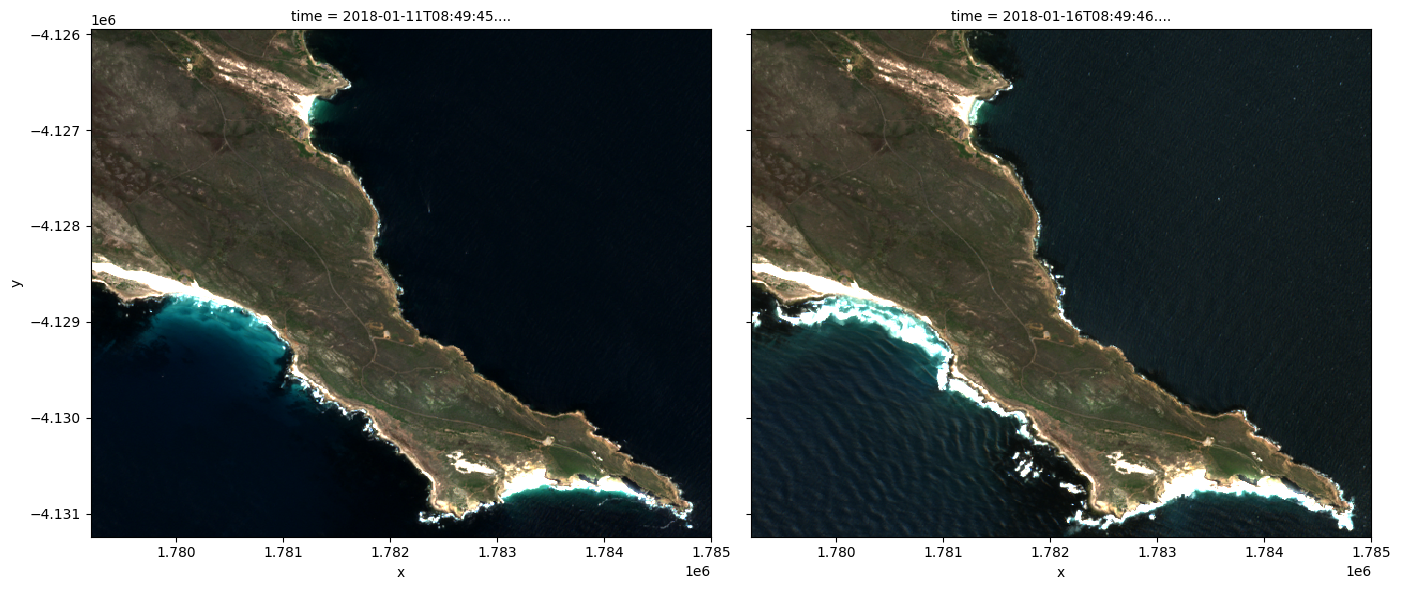

In [9]:
rgb(ds_load, index=[1,2])

## Load Sentinel-2 using `load_ard`

This function will load images from Sentinel-2 and apply a cloud/pixel-quality mask.
The result is an analysis ready dataset free of cloud, cloud-shadow, and missing data.

You can find more information on this function from the [Using load ard](../Frequently_used_code/Using_load_ard.ipynb) notebook.

>Note: For `load_ard` function, the offset is already handled internally, so no additional correction is needed.

In [10]:
ds = load_ard(dc=dc,
              products=["s2_l2a_c1"],
              measurements=['red', 'green', 'blue', 'SCL'],
              y=(-34.31, -34.36),
              x=(18.44, 18.50),
              time=("2018-01", "2018-01"),
              resolution=(-10, 10),
              output_crs='EPSG:6933',
              group_by="solar_day"
             )

ds

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a_c1
Applying pixel quality/cloud mask
Re-scaling Sentinel-2 C1 data
Loading 5 time steps


/opt/venv/lib/python3.12/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(


<xarray.Dataset> Size: 20MB
Dimensions:      (time: 5, y: 529, x: 580)
Coordinates:
  * time         (time) datetime64[ns] 40B 2018-01-01T08:49:43.522000 ... 201...
  * y            (y) float64 4kB -4.126e+06 -4.126e+06 ... -4.131e+06 -4.131e+06
  * x            (x) float64 5kB 1.779e+06 1.779e+06 ... 1.785e+06 1.785e+06
    spatial_ref  int32 4B 6933
Data variables:
    red          (time, y, x) float32 6MB nan nan nan nan ... 251.0 254.0 222.0
    green        (time, y, x) float32 6MB nan nan nan nan ... 276.0 357.0 311.0
    blue         (time, y, x) float32 6MB nan nan nan nan ... 290.0 382.0 394.0
    SCL          (time, y, x) uint8 2MB 9 9 9 9 9 9 9 9 9 ... 6 6 6 6 6 6 6 6 6
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

Below we plot the cloud masked Sentinel-2 data.

> Note: In the left image, notice that the Sentinel-2 cloud mask (`SCL` band) fails to identify a lot of the cloud cover. In the image on the right, some of the bright, white coastline has been miss-classified as cloud. These are known limitations of the Sentinel-2 cloud mask, and users should be wary of these limitations when conducting analyses.

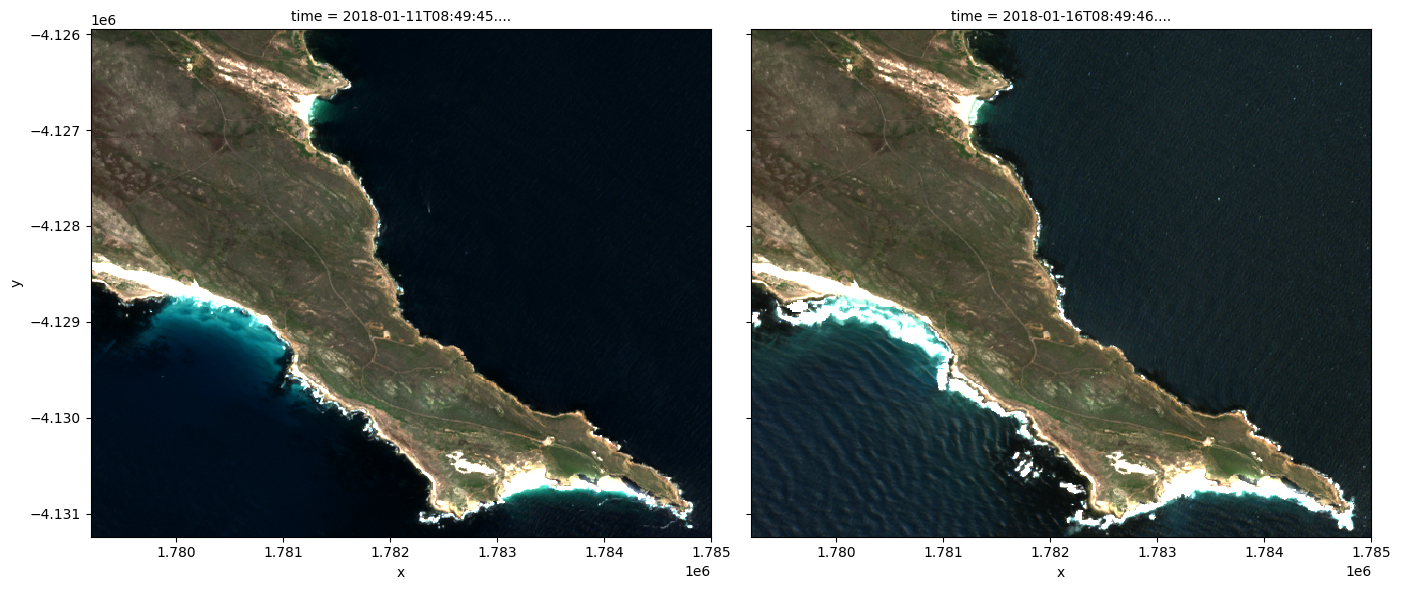

In [11]:
rgb(ds, index=[1,2])

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [12]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [13]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-06-04'